In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Install required packages.
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

2.0.1+cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 61.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 45.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [3]:
!python -m pip install tensorflow_text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 87.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 61.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 48.3 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.6.3
    Uninstalling typing_extensions-4.6.3:
      Successfully uninstalled typing_extensions-4.6.3
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    Fou

In [4]:
!pip3 install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 78.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 107.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.0 MB/s eta 0:00:00


In [5]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import pandas as pd
import os
import numpy as np

In [6]:
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Embedding, LSTM, Bidirectional, Dropout, Dense, concatenate
from transformers import TFBertForSequenceClassification
from keras.layers import Flatten
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, Bidirectional, Conv1D, concatenate, Flatten
from tensorflow.keras.models import Model
from transformers import TFBertModel
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Reshape

In [7]:
df_train = pd.read_csv(r'/content/drive/MyDrive/NCKH_Trinh_Kien_Hoang/Dataset/KLTN/train.csv')
df_test = pd.read_csv(r'/content/drive/MyDrive/NCKH_Trinh_Kien_Hoang/Dataset/KLTN/test.csv')

In [8]:
def get_graph_feature():
    graph_feature_train_data_path = "/content/drive/MyDrive/NCKH_Trinh_Kien_Hoang/Dataset/KLTN/train_feature.txt"

    graph_feature_test_data_path = "/content/drive/MyDrive/NCKH_Trinh_Kien_Hoang/Dataset/KLTN/test_feature.txt"

    graph_feature_train = np.loadtxt(graph_feature_train_data_path).tolist()  # graph feature train
    graph_feature_test = np.loadtxt(graph_feature_test_data_path).tolist()  # graph feature test

    for i in range(len(graph_feature_train)):
        graph_feature_train[i] = [graph_feature_train[i]]

    for i in range(len(graph_feature_test)):
        graph_feature_test[i] = [graph_feature_test[i]]

    return graph_feature_train, graph_feature_test

In [9]:
graph_train, graph_test = get_graph_feature()
graph_train = np.array(graph_train)
graph_test = np.array(graph_test)

In [10]:
df_train['source_code'] = df_train['source_code'].astype(str)
df_test['source_code'] = df_test['source_code'].astype(str)

In [11]:
from keras.utils import to_categorical
y_train = df_train['label'].values
y_train = to_categorical(y_train)
y_test = df_test['label'].values
y_test = to_categorical(y_test)

In [12]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [13]:
bert_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='source_code')
preprocessed_text = bert_preprocess(bert_input)
bert_outputs = bert_encoder(preprocessed_text)

bert_output = tf.keras.layers.Dropout(0.3)(bert_outputs['pooled_output'])
bert_output = tf.keras.layers.Dense(64, name="bert_output")(bert_output)

In [14]:
gnn_input = tf.keras.Input(shape=(1,3), name='gnn_input')
# gnn_layer1 = tf.keras.layers.Conv1D(200, kernel_size=3, strides=1, activation=tf.nn.relu, padding='same')(gnn_input)
# gnn_layer2 = tf.keras.layers.MaxPooling1D(pool_size=1, strides=1)(gnn_layer1)
gnn_output = tf.keras.layers.Dense(64, activation='relu')(gnn_input)
gnn_output_flattened = tf.keras.layers.Flatten()(gnn_output)  # Flatten gnn_output
# gnn_layer1 = tf.keras.layers.Conv1D(200, kernel_size=3, strides=1, activation=tf.nn.relu)(gnn_input)
# gnn_output = tf.keras.layers.MaxPooling1D(pool_size=1, strides=1)(gnn_layer1)

In [15]:
concatenated = concatenate([bert_output, gnn_output_flattened], axis=-1)
concatenated_reshaped = Reshape((128, 1))(concatenated)
conv_out = Conv1D(64, 3, activation='relu')(concatenated_reshaped)
flatten_out = Flatten()(conv_out)
dense_out = Dense(32, activation='relu')(flatten_out)
dense_out = Dropout(0.3)(dense_out)
final_out = Dense(3, activation='softmax')(dense_out)

In [16]:
from tensorflow.keras import optimizers
model = Model(inputs=[bert_input, gnn_input], outputs=final_out)

METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=METRICS)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 source_code (InputLayer)    [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_mask': (None, 128)   0         ['source_code[0][0]']         
                             , 'input_type_ids': (None,                                           
                              128),                                                               
                              'input_word_ids': (None,                                            
                             128)}                                                                
                                                                                              

In [17]:
model.fit([df_train['source_code'], graph_train], y_train, epochs=30, batch_size=32)

Epoch 1/30
45/45 [==============================] - 34s 363ms/step - loss: 0.6070 - accuracy: 0.6940 - precision: 0.5803 - recall: 0.2961
Epoch 2/30
45/45 [==============================] - 16s 364ms/step - loss: 0.5560 - accuracy: 0.7277 - precision: 0.6161 - recall: 0.4855
Epoch 3/30
45/45 [==============================] - 16s 365ms/step - loss: 0.5396 - accuracy: 0.7416 - precision: 0.6445 - recall: 0.5011
Epoch 4/30
45/45 [==============================] - 17s 368ms/step - loss: 0.5355 - accuracy: 0.7404 - precision: 0.6445 - recall: 0.4933
Epoch 5/30
45/45 [==============================] - 17s 371ms/step - loss: 0.5238 - accuracy: 0.7461 - precision: 0.6735 - recall: 0.4622
Epoch 6/30
45/45 [==============================] - 17s 374ms/step - loss: 0.4971 - accuracy: 0.7597 - precision: 0.6756 - recall: 0.5371
Epoch 7/30
45/45 [==============================] - 17s 376ms/step - loss: 0.4941 - accuracy: 0.7642 - precision: 0.6819 - recall: 0.5484
Epoch 8/30
45/45 [================

In [18]:
import pickle
with open('/content/drive/MyDrive/NCKH_Trinh_Kien_Hoang/Model/M2.pkl', 'wb') as file:
    pickle.dump(model, file)

In [18]:
model.evaluate([df_test['source_code'], graph_test], y_test, verbose=1, batch_size=32)

12/12 [==============================] - 5s 357ms/step - loss: 0.4239 - accuracy: 0.7825 - precision: 0.7030 - recall: 0.6017


[0.42390570044517517,
 0.7824859023094177,
 0.7029703259468079,
 0.6016949415206909]

In [19]:
y_pred = model.predict([df_test['source_code'], graph_test], batch_size=32)

12/12 [==============================] - 5s 371ms/step


In [20]:
import numpy as np
# Convert predictions to class labels
y_predicted_1 = np.argmax(y_pred, axis=1)
y_test_1 = np.argmax(y_test, axis=1)

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_1, y_predicted_1, digits=4))

              precision    recall  f1-score   support

           0     0.6094    0.5778    0.5932       135
           1     0.4922    0.6117    0.5455       103
           2     0.9082    0.7672    0.8318       116

    accuracy                         0.6497       354
   macro avg     0.6699    0.6522    0.6568       354
weighted avg     0.6732    0.6497    0.6575       354



In [21]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_1, y_predicted_1))

0.6497175141242938


In [22]:
# model.save('/content/drive/MyDrive/NCKH_Trinh_Kien_Hoang/Model/M2')

In [22]:
model.save('saved_model/bert_mutil_data')
acc = []
pre = []
rec = []
f1 = []
for i in range(11, 31):
  print(i)
  model = tf.keras.models.load_model('saved_model/bert_mutil_data')
  model.fit([df_train['source_code'], graph_train], y_train, epochs=1, batch_size=32)
  y_predicted = model.predict([df_test['source_code'], graph_test], batch_size=32)
  y_predicted_1 = np.argmax(y_predicted, axis=1)
  y_test_1 = np.argmax(y_test, axis=1)
  metric = [i for i in classification_report(y_test_1, y_predicted_1, digits=4).split('\n')[-2].split(' ')[2:-1] if i != '']
  acc.append(round(accuracy_score(y_test_1, y_predicted_1), 4))
  pre.append(metric[0])
  rec.append(metric[1])
  f1.append(metric[2])
  model.save('saved_model/bert_mutil_data')

11
12/12 [==============================] - 5s 374ms/step
12
12/12 [==============================] - 5s 369ms/step
13
12/12 [==============================] - 5s 373ms/step
14
12/12 [==============================] - 5s 374ms/step
15
12/12 [==============================] - 5s 368ms/step
16
12/12 [==============================] - 5s 364ms/step
17
12/12 [==============================] - 5s 365ms/step
18
12/12 [==============================] - 5s 370ms/step
19
12/12 [==============================] - 5s 372ms/step
20
12/12 [==============================] - 5s 366ms/step
21
12/12 [==============================] - 5s 365ms/step
22
12/12 [==============================] - 5s 371ms/step
23
12/12 [==============================] - 5s 370ms/step
24
12/12 [==============================] - 5s 367ms/step
25
12/12 [==============================] - 5s 367ms/step
26
12/12 [==============================] - 5s 369ms/step
27
12/12 [==============================] - 5s 374ms/step
28
12/12 [====

In [23]:
for i in acc:
  print(i)

0.6441
0.6525
0.6469
0.6215
0.6328
0.6299
0.6328
0.661
0.6554
0.6384
0.6469
0.6638
0.6723
0.6384
0.6441
0.6554
0.6723
0.6751
0.6638
0.6836


In [24]:
for i in pre:
  print(i)

0.6587
0.6626
0.6619
0.6500
0.6554
0.6387
0.6588
0.6756
0.6730
0.6546
0.6798
0.6757
0.6854
0.6606
0.6640
0.7157
0.6856
0.6980
0.7092
0.7016


In [25]:
for i in rec:
  print(i)

0.6441
0.6525
0.6469
0.6215
0.6328
0.6299
0.6328
0.6610
0.6554
0.6384
0.6469
0.6638
0.6723
0.6384
0.6441
0.6554
0.6723
0.6751
0.6638
0.6836


In [26]:
for i in f1:
  print(i)

0.6494
0.6556
0.6470
0.6226
0.6365
0.6308
0.6346
0.6637
0.6564
0.6355
0.6486
0.6683
0.6758
0.6422
0.6502
0.6523
0.6769
0.6800
0.6631
0.6896


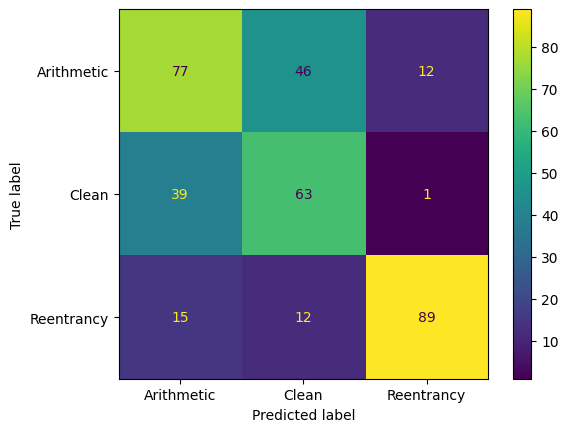

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_1, y_predicted_1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Arithmetic", "Clean", "Reentrancy"])

cm_display.plot()
plt.show()

In [ ]:
model.save('saved_model/mutil2_data')

In [ ]:
model1 = tf.keras.models.load_model('saved_model/mutil2_data')

In [ ]:
model1.fit([df_train['source_code'], graph_train], y_train, epochs=10, batch_size=32)

Epoch 1/10
45/45 [==============================] - 21s 170ms/step - loss: 0.4785 - accuracy: 0.7642 - precision: 0.6769 - recall: 0.5597
Epoch 2/10
45/45 [==============================] - 8s 169ms/step - loss: 0.4777 - accuracy: 0.7597 - precision: 0.6737 - recall: 0.5413
Epoch 3/10
45/45 [==============================] - 7s 166ms/step - loss: 0.4550 - accuracy: 0.7729 - precision: 0.6893 - recall: 0.5802
Epoch 4/10
45/45 [==============================] - 8s 170ms/step - loss: 0.4497 - accuracy: 0.7812 - precision: 0.7106 - recall: 0.5795
Epoch 5/10
45/45 [==============================] - 7s 167ms/step - loss: 0.4530 - accuracy: 0.7762 - precision: 0.6999 - recall: 0.5753
Epoch 6/10
45/45 [==============================] - 8s 168ms/step - loss: 0.4496 - accuracy: 0.7769 - precision: 0.7028 - recall: 0.5731
Epoch 7/10
45/45 [==============================] - 7s 166ms/step - loss: 0.4420 - accuracy: 0.7819 - precision: 0.7102 - recall: 0.5837
Epoch 8/10
45/45 [======================

In [ ]:
model1.evaluate([df_test['source_code'], graph_test], y_test, verbose=1, batch_size=32)

12/12 [==============================] - 3s 157ms/step - loss: 0.4469 - accuracy: 0.7684 - precision: 0.6849 - recall: 0.5650


[0.4468836784362793,
 0.7683615684509277,
 0.6849315166473389,
 0.5649717450141907]

In [ ]:
y_predicted1 = model1.predict([df_test['source_code'], graph_test], batch_size=32)
y_predicted1 = np.argmax(y_predicted1, axis=1)
y_test = np.argmax(y_test, axis=1)

12/12 [==============================] - 3s 154ms/step


In [ ]:
print(classification_report(y_test, y_predicted1))

              precision    recall  f1-score   support

           0       0.61      0.56      0.59       135
           1       0.52      0.65      0.58       103
           2       0.89      0.77      0.82       116

    accuracy                           0.66       354
   macro avg       0.67      0.66      0.66       354
weighted avg       0.68      0.66      0.66       354



In [ ]:
print(accuracy_score(y_test, y_predicted1))

0.655367231638418


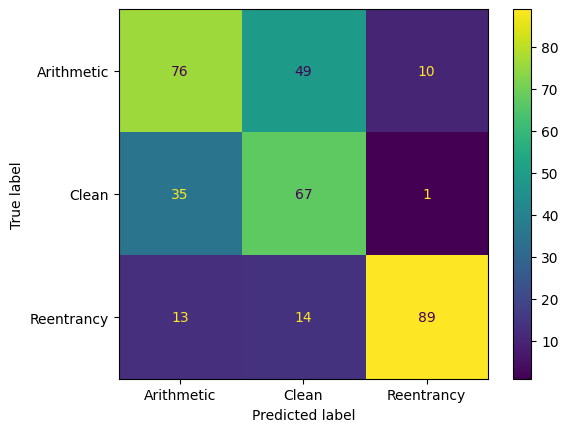

In [ ]:
cm = confusion_matrix(y_test, y_predicted1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Arithmetic", "Clean", "Reentrancy"])

cm_display.plot()
plt.show()

In [ ]:
model1.save('saved_model/mutil2_data')

In [ ]:
model2 = tf.keras.models.load_model('saved_model/mutil2_data')

In [ ]:
model2.fit([df_train['source_code'], graph_train], y_train, epochs=10, batch_size=32)

Epoch 1/10
45/45 [==============================] - 20s 170ms/step - loss: 0.4409 - accuracy: 0.7920 - precision: 0.7258 - recall: 0.6042
Epoch 2/10
45/45 [==============================] - 8s 167ms/step - loss: 0.4207 - accuracy: 0.7962 - precision: 0.7315 - recall: 0.6141
Epoch 3/10
45/45 [==============================] - 8s 168ms/step - loss: 0.4157 - accuracy: 0.7958 - precision: 0.7246 - recall: 0.6247
Epoch 4/10
45/45 [==============================] - 8s 167ms/step - loss: 0.4366 - accuracy: 0.7866 - precision: 0.7283 - recall: 0.5739
Epoch 5/10
45/45 [==============================] - 8s 168ms/step - loss: 0.4285 - accuracy: 0.8005 - precision: 0.7375 - recall: 0.6233
Epoch 6/10
45/45 [==============================] - 8s 170ms/step - loss: 0.4237 - accuracy: 0.7953 - precision: 0.7302 - recall: 0.6120
Epoch 7/10
45/45 [==============================] - 8s 170ms/step - loss: 0.4368 - accuracy: 0.7882 - precision: 0.7154 - recall: 0.6057
Epoch 8/10
45/45 [======================

In [ ]:
y_test2 = df_test['label'].values
y_test2 = to_categorical(y_test2)

In [ ]:
model2.evaluate([df_test['source_code'], graph_test], y_test2, verbose=1, batch_size=32)

12/12 [==============================] - 3s 157ms/step - loss: 0.4467 - accuracy: 0.7834 - precision: 0.7403 - recall: 0.5395


[0.4467281699180603,
 0.7834274768829346,
 0.7403100728988647,
 0.5395480394363403]

In [ ]:
import numpy as np
y_predicted2 = model2.predict([df_test['source_code'], graph_test], batch_size=32)
y_predicted2 = np.argmax(y_predicted2, axis=1)
y_test2 = np.argmax(y_test2, axis=1)

12/12 [==============================] - 3s 154ms/step


In [ ]:
print(classification_report(y_test2, y_predicted2))

              precision    recall  f1-score   support

           0       0.70      0.44      0.54       135
           1       0.49      0.80      0.61       103
           2       0.89      0.77      0.82       116

    accuracy                           0.65       354
   macro avg       0.69      0.67      0.66       354
weighted avg       0.70      0.65      0.65       354



In [ ]:
print(accuracy_score(y_test2, y_predicted2))

0.652542372881356


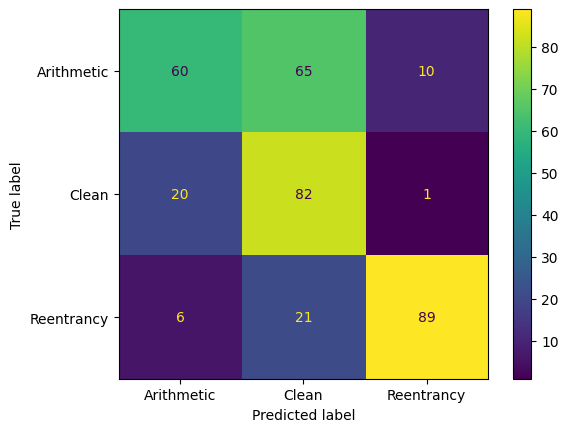

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test2, y_predicted2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Arithmetic", "Clean", "Reentrancy"])

cm_display.plot()
plt.savefig("/content/drive/MyDrive/NCKH_Trinh_Kien_Hoang/Figure/KLTN/Multimodal2_30.png", dpi=1200, transparent=True)
plt.show()